<big>Part 1: Review of different Python data types

Let us first review some elementary Python types that we can use to store and manipulate data. 

Strings are "text-like" pieces of data

In [26]:
name = 'Louis'
print(name)
print(type(name))

name_2 = 'Tim'
emergentees = name + ', ' + name_2
print(emergentees)

Louis
<class 'str'>
Louis, Tim


Numbers can be either of type "int" (integer) or "float"

In [10]:
first_number = 5
second_number = 5.0
print(type(first_number), type(second_number))
print(type(first_number + second_number))

<class 'int'> <class 'float'>
<class 'float'>


Tuples are IMMUTABLE sequences of elements. They can however be concatenated

In [44]:
first_tuple = (1, 2, 3, 4)
second_tuple = (5, 6, 7)
third_tuple = first_tuple + second_tuple
print(third_tuple)
print(third_tuple*3)
print(len(third_tuple))

(1, 2, 3, 4, 5, 6, 7)
(1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7)
7


Lists are mutable sequences: it is easy to add or remove an element from them

In [18]:
first_list = [1, 2, 3, 4, 5]
first_list.append(10)
print(first_list)
first_list.remove(2)
print(first_list)

[1, 2, 3, 4, 5, 10]
[1, 3, 4, 5, 10]


In [19]:
first_list.remove(100)

ValueError: list.remove(x): x not in list

Here is a combined example involving a small loop

In [21]:
to_be_filled = []
for element in third_tuple:
    to_be_filled.append(element)
print(to_be_filled)

[1, 2, 3, 4, 5, 6, 7]


Here are some examples of how sequences are sliced and indexed in Python

In [22]:
print(to_be_filled[0]) #index starts at 0
print(to_be_filled[-2]) #negative index accepted
print(to_be_filled[1:3]) #slice
print(to_be_filled[2:])

1
6
[2, 3]
[3, 4, 5, 6, 7]


It is also possible to embed sequences in each other to form more-dimensional structures. Common examples are matrices made out of a list of lists.

In [33]:
mat = [[1, 2, 3],[4, 5, 6]]
print(mat)
print(mat[0][2])# print element of 1st row and 2nd column
print(mat[1])
print(mat[1][:]) #print second row

[[1, 2, 3], [4, 5, 6]]
3
[4, 5, 6]
[4, 5, 6]


Dictionaries are more elaborate structures that associate a "key" to a "value". Values can have different types and can be for example strings or integers. Take the example of scores to an exam:

In [36]:
dict = {'Louis': 20, 'Tim': 16, 'Jenni': 15, 'Emma': 17}
print(dict)

{'Louis': 20, 'Tim': 16, 'Jenni': 15, 'Emma': 17}


In [37]:
print(dict[2])

KeyError: 2

In [41]:
print(dict.keys())
print(dict.values())
print(dict.items())
print(dict['Jenni'])

dict_keys(['Louis', 'Tim', 'Jenni', 'Emma'])
dict_values([20, 16, 15, 17])
dict_items([('Louis', 20), ('Tim', 16), ('Jenni', 15), ('Emma', 17)])
15


In [43]:
dict['David'] = 14 #dictionaries can be very easily extended
print(dict)

{'Louis': 20, 'Tim': 16, 'Jenni': 15, 'Emma': 17, 'David': 14}


From this dictionary, we can, for example, compute the mean score of the exam

In [52]:
mean = sum(dict.values())/len(dict)
print(mean)

16.4


As a more elaborate example, we will open a .csv file and read each row as a dictionary. This will allow us to manipulate the data to get specific results.

In [40]:
import csv

with open('exams.csv', 'r') as infile, open('exams_new', 'w') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile, delimiter=',', quotechar='"', quoting = csv.QUOTE_ALL)
    writer.writerows(reader) #this step is necessary because the first column doesn't have quotations ""
    
with open('exams_new') as csvfile:
    exams_data = list(csv.DictReader(csvfile))
exams_data[0]  #first row = first dictionary

OrderedDict([('gender', 'male'),
             ('race/ethnicity', 'group B'),
             ('parental level of education', "associate's degree"),
             ('lunch', 'free/reduced'),
             ('test preparation course', 'none'),
             ('math score', '62'),
             ('reading score', '63'),
             ('writing score', '58')])

This dataset tells us, for each 100 student of a school:
* the gender, "male" or "female"
* the ethnicity (5 different groups, from A to E)
* the parental level of education ("college", "some college", "some high school", "high school", "master's degree", "associate's degree", "bachelor's degree")
* whether the student has right to a reduced/free lunch or has to pay the standard price ("reduced/free" or standard")
* whether the student participated in a preparation course ("none" or "completed")
* the student's score to 3 different tests, in percents

The overall structure of exams_data is a list of dictionaries. Here are a few examples of what we can do with this set:

In [41]:
print(len(exams_data)) #see how many students there are

100


An easy way to iterate over all dictionaries in this case is to use what we call a list comprehension, which is simply a compact way of writing a for loop:

In [43]:
list_of_math_scores = [int(d['math score']) for d in exams_data] #creates a list of all math scores
print(list_of_math_scores[:10])

[62, 69, 73, 50, 78, 84, 53, 91, 69, 30]


In [49]:
print(set(d['parental level of education'] for d in exams_data)) #returns all possible values of a given key

{'some college', "master's degree", 'high school', "associate's degree", 'some high school', "bachelor's degree"}


Try now yourself to:
* extend the data set with an entry "GPA" (grade point average) containing the average score of the 3 tests for each student
* construct a list of 5 tuples of the form (Group X (ethnicity), average GPA pf the group), sorted according to the average GPAs. You might want to google the Python function "sort" for this

Solution: see file uploaded after workshop. 

In [56]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x1aba1a7ee48>,
 <a list of 5 Text xticklabel objects>)

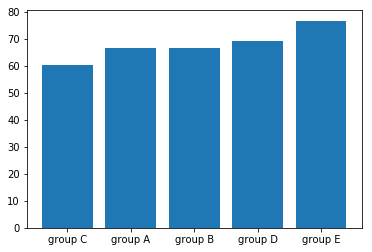

In [60]:
x_coord = range(len(solution)) #this defines the placement of the bars
scores = [x[1] for x in solution]
groups = [x[0] for x in solution]
plt.bar(x_coord, scores)
plt.xticks(x_coord, groups) #this is the argument needed to have the group names appearing on the horizontal axis

<big>Part 2: Introduction to pandas

Pandas is where data science all begins in Python. It is a library that allows you to construct structures called dataframes and to manipulate them very easily. The possibility of pandas dataframes are very wide.
* Let us read the same csv file as before, but this time in a pandas dataframe

In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,associate's degree,free/reduced,none,62,63,58
1,male,group B,high school,free/reduced,completed,69,87,78
2,male,group C,some college,free/reduced,completed,73,77,70
3,female,group A,some college,standard,completed,50,65,64
4,female,group C,some high school,standard,completed,78,80,80
5,female,group E,some college,free/reduced,completed,84,100,100
6,male,group D,some high school,free/reduced,none,53,63,55
7,male,group D,master's degree,free/reduced,completed,91,91,89
8,female,group D,associate's degree,free/reduced,none,69,74,72
9,female,group C,some college,free/reduced,none,30,42,39


As you can see, the function directly catches the structure of the file. Here are a few basic ways of using the dataframe. 

In [68]:
df.head() #returns the first 5 rows of the dataframe
#df.tail() #returns the last 5 rows of the dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,associate's degree,free/reduced,none,62,63,58
1,male,group B,high school,free/reduced,completed,69,87,78
2,male,group C,some college,free/reduced,completed,73,77,70
3,female,group A,some college,standard,completed,50,65,64
4,female,group C,some high school,standard,completed,78,80,80


In [69]:
df_lunch = df['lunch']
print(type(df_lunch))
df_lunch

<class 'pandas.core.series.Series'>


0     free/reduced
1     free/reduced
2     free/reduced
3         standard
4         standard
5     free/reduced
6     free/reduced
7     free/reduced
8     free/reduced
9     free/reduced
10        standard
11    free/reduced
12    free/reduced
13    free/reduced
14        standard
15    free/reduced
16        standard
17        standard
18        standard
19        standard
20    free/reduced
21        standard
22        standard
23    free/reduced
24    free/reduced
25    free/reduced
26    free/reduced
27        standard
28        standard
29    free/reduced
          ...     
70    free/reduced
71        standard
72        standard
73        standard
74        standard
75    free/reduced
76    free/reduced
77    free/reduced
78        standard
79        standard
80        standard
81        standard
82        standard
83    free/reduced
84    free/reduced
85        standard
86        standard
87    free/reduced
88        standard
89        standard
90    free/reduced
91        st

In [30]:
df_lunch2 = df.lunch

Besides dataframes, the other sort of typical pandas objects are series. Calling one column (like here above) generates a series containing all the elements of that column. 

In [70]:
df_columns = df.columns
print(type(df_columns))
df_columns

<class 'pandas.core.indexes.base.Index'>


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [71]:
df[0:1]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,associate's degree,free/reduced,none,62,63,58


In [72]:
df[0]

KeyError: 0

In [73]:
df.loc[3, 'math score']
df.loc[4:6, ['gender', 'lunch']] #use .loc for selection by label

,gender,lunch
4,female,standard
5,female,free/reduced
6,male,free/reduced


In [74]:
df.iloc[4:6, 0:4] #use .iloc for selection by integer slices

,gender,race/ethnicity,parental level of education,lunch
4,female,group C,some high school,standard
5,female,group E,some college,free/reduced


In [131]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group E', 'group D'],
      dtype=object)

In [75]:
df[df['math score'] > 90] #selects all students that have a math score above 90%

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
7,male,group D,master's degree,free/reduced,completed,91,91,89
22,male,group E,some college,standard,none,100,94,90
31,female,group D,bachelor's degree,standard,completed,98,100,100
68,female,group E,bachelor's degree,standard,completed,100,100,100


In [76]:
df[df['race/ethnicity'].isin(['group A'])]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,female,group A,some college,standard,completed,50,65,64
20,female,group A,high school,free/reduced,completed,78,96,87
37,female,group A,bachelor's degree,standard,none,60,74,68
45,male,group A,associate's degree,standard,completed,86,90,85
52,male,group A,associate's degree,free/reduced,none,62,68,58
57,male,group A,master's degree,free/reduced,none,70,72,73
81,male,group A,associate's degree,standard,none,62,38,39
87,female,group A,associate's degree,free/reduced,none,64,75,72
99,male,group A,high school,standard,none,49,49,42


The data we have looked at so far is perfectly clean, i. e. it has no missing values. When the data have such missing values, pandas offers easy ways to deal with this. In what follows, we will add a column 'french score' to the data. Imagine that only half the students participated in the exam. For the other half, no value can be assigned to their score. 

In [77]:
import numpy.random as rd

In [79]:
df = df.reindex(index = df.index, columns=list(df.columns) + ['French score'])
for i in range(0, len(df['French score']), 2):
    df.loc[i, 'French score'] = rd.randint(50, 100)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,French score
0,male,group B,associate's degree,free/reduced,none,62,63,58,67.0
1,male,group B,high school,free/reduced,completed,69,87,78,NaN
2,male,group C,some college,free/reduced,completed,73,77,70,91.0
3,female,group A,some college,standard,completed,50,65,64,NaN
4,female,group C,some high school,standard,completed,78,80,80,83.0
5,female,group E,some college,free/reduced,completed,84,100,100,NaN
6,male,group D,some high school,free/reduced,none,53,63,55,67.0
7,male,group D,master's degree,free/reduced,completed,91,91,89,NaN
8,female,group D,associate's degree,free/reduced,none,69,74,72,93.0
9,female,group C,some college,free/reduced,none,30,42,39,NaN


In [80]:
df.dropna(how='any')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,French score
0,male,group B,associate's degree,free/reduced,none,62,63,58,67.0
2,male,group C,some college,free/reduced,completed,73,77,70,91.0
4,female,group C,some high school,standard,completed,78,80,80,83.0
6,male,group D,some high school,free/reduced,none,53,63,55,67.0
8,female,group D,associate's degree,free/reduced,none,69,74,72,93.0
10,female,group B,some college,standard,completed,67,86,81,91.0
12,male,group E,high school,free/reduced,completed,69,69,59,55.0
14,male,group B,some college,standard,completed,65,70,68,77.0
16,female,group E,high school,standard,none,63,70,68,72.0
18,female,group B,some high school,standard,completed,65,78,75,58.0


In [100]:
pd.isna(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,French score
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True


In [93]:
df_filled = df.fillna(value=0)
df_filled

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,French score
0,male,group B,associate's degree,free/reduced,none,62,63,58,67.0
1,male,group B,high school,free/reduced,completed,69,87,78,0.0
2,male,group C,some college,free/reduced,completed,73,77,70,91.0
3,female,group A,some college,standard,completed,50,65,64,0.0
4,female,group C,some high school,standard,completed,78,80,80,83.0
5,female,group E,some college,free/reduced,completed,84,100,100,0.0
6,male,group D,some high school,free/reduced,none,53,63,55,67.0
7,male,group D,master's degree,free/reduced,completed,91,91,89,0.0
8,female,group D,associate's degree,free/reduced,none,69,74,72,93.0
9,female,group C,some college,free/reduced,none,30,42,39,0.0


When filling in missing values it is important to bear in mind that the values you use have an influence when processing the data, e. g. when computing the mean value of a series. 

In [99]:
print(df['French score'].mean())
print(df_filled['French score'].mean())

73.1
36.55


In [134]:
ethnic_groups = df['race/ethnicity']
count_values = ethnic_groups.value_counts()
count_values_norm = ethnic_groups.value_counts(normalize=True)
count_values_norm

group B    0.26
group D    0.25
group C    0.25
group E    0.15
group A    0.09
Name: race/ethnicity, dtype: float64

In [91]:
df.groupby('test preparation course').mean()

,math score,reading score,writing score,French score
test preparation course,,,,
completed,68.846154,75.692308,74.000000,74.350000
none,62.885246,65.229508,62.327869,72.266667


Besides pyplot, another very useful Matlab-like package for plotting is Seaborn. Like pyplot, it is also part of matplotlib, but it is more specialized in statistical visualization. The data you feed to seaborn (scatterplot in this case) has to be in the form of a dataframe. 

In [1]:
import seaborn as sns

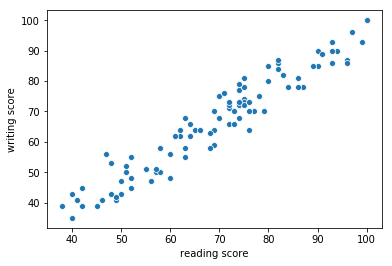

In [95]:
sns.scatterplot(x='reading score', y='writing score', data=df)

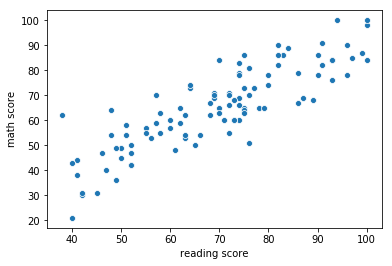

In [96]:
sns.scatterplot(x='reading score', y='math score', data=df)

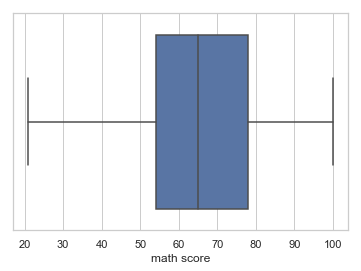

In [121]:
sns.set(style="whitegrid")
sns.boxplot(x='math score', data = df)

Try now yourself to:
* make a box plot of the reading scores for people who attended the preparation course and people who didn't, below each other. Think of what you want to see on each axis.  
* make a bar plot of the number of students that have a reading score above 80 per level of parental education. Since we are dealing with pandas structures you can use the seaborn version of barplot, which as roughly the same syntax as scatterplot and boxplot. Another option is to plot it with countplot (again, similar syntax). 
* generate a dataframe where mean scores for each exam are displayed per ethnic group AND per parental level of education within each ethinc group. Hint: the function groupby() can take more than one category as argument, if those categories are fed in a list [ ]. 

Solutions: see file uploaded after workshop.